                                             Parcial 2 Mantenimiento 

Elkin Aldanir 

Santiago Guerrero  1088019827

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

Datos a analizar

In [3]:
ruta = 'C:\\Users\\santi\\Downloads\\Data\\'
#ruta de los archivos a analizar
df = pd.read_csv (ruta+'ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Porcentaje de Participantes por Genero

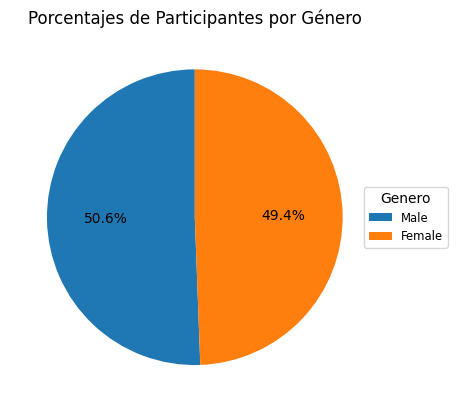

In [5]:
participantes=len(df)
porcentajes_por_genero=df['Gender'].value_counts(normalize=True)*100

# Crear el gráfico circular
plt.pie(porcentajes_por_genero,  autopct='%1.1f%%', startangle=90)
plt.title('Porcentajes de Participantes por Género')
plt.legend(title='Genero',labels=porcentajes_por_genero.index,loc='center right',bbox_to_anchor=(1.2, 0.5), fontsize='small')
plt.subplots_adjust(right=0.8)
plt.axis('off')
plt.show()


Fumadores 

Gender
Female    15
Male      29
Name: SMOKE, dtype: int64


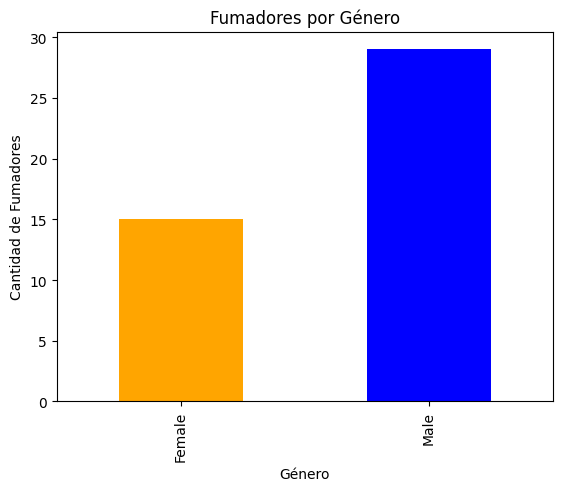

In [6]:
# Limpiar y normalizar los datos en la columna 'SMOKE'
df['SMOKE'] = df['SMOKE'].str.strip().str.lower()
fumadores = df[df['SMOKE'] == 'yes']




fumadores_por_genero = fumadores.groupby('Gender')['SMOKE'].count()
print(fumadores_por_genero)

colors = ['orange', 'blue']
fumadores_por_genero.plot(kind='bar',color=colors)
plt.title('Fumadores por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Fumadores')
plt.show()




Tipos de obesidad

In [7]:
probabilidad_obesidad=df['NObeyesdad'].value_counts(normalize=True)*100
print(probabilidad_obesidad)

NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64


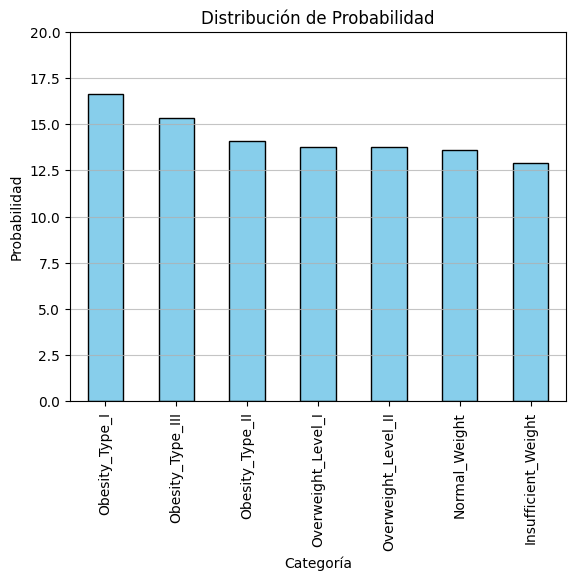

In [8]:

probabilidad_obesidad.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Probabilidad')
plt.xlabel('Categoría')
plt.ylabel('Probabilidad')

plt.grid(axis='y', alpha=0.75)
plt.ylim(0, 20)
plt.show()


Probabilidad de Obesidad  por Genero

In [9]:
probabilidad_obesidad_genero=df.groupby('Gender')['NObeyesdad'].value_counts(normalize=True)*100
print(probabilidad_obesidad_genero)

Gender  NObeyesdad         
Female  Obesity_Type_III       30.968360
        Insufficient_Weight    16.586769
        Obesity_Type_I         14.956855
        Overweight_Level_I     13.902205
        Normal_Weight          13.518696
        Overweight_Level_II     9.875360
        Obesity_Type_II         0.191755
Male    Obesity_Type_II        27.621723
        Obesity_Type_I         18.258427
        Overweight_Level_II    17.509363
        Normal_Weight          13.670412
        Overweight_Level_I     13.576779
        Insufficient_Weight     9.269663
        Obesity_Type_III        0.093633
Name: proportion, dtype: float64


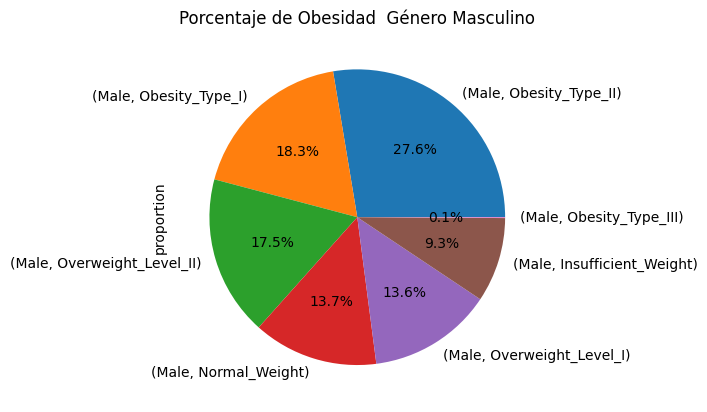

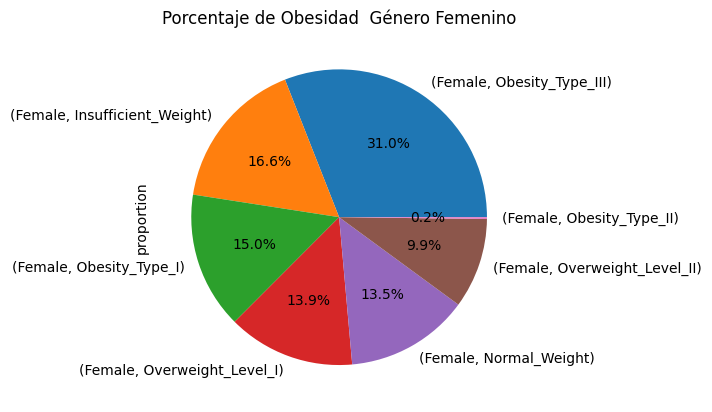

In [10]:

masculino = probabilidad_obesidad_genero[probabilidad_obesidad_genero.index.get_level_values('Gender') == 'Male']
masculino.plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentaje de Obesidad  Género Masculino')
plt.show()


femenino = probabilidad_obesidad_genero[probabilidad_obesidad_genero.index.get_level_values('Gender') == 'Female']
femenino.plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentaje de Obesidad  Género Femenino')

plt.show()



calculo de probabilidad de ser obeso por genero usando arboles de decision

In [11]:
le_genero = LabelEncoder()
df['Gender'] = le_genero.fit_transform(df['Gender'])

le_obesidad = LabelEncoder()
df['NObeyesdad'] = le_obesidad.fit_transform(df['NObeyesdad'])

# Seleccionar las características de entrada (X) y la variable de salida (y)
X = df[['Gender']] 
y = df['NObeyesdad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión
tree = DecisionTreeClassifier(random_state=50)
tree.fit(X_train, y_train)

# Calcular y mostrar las probabilidades para el género masculino (0)
X_gender = [[0]] # Para el género masculino
probabilidades_obesidad = tree.predict_proba(X_gender)

# Imprimir las probabilidades para cada tipo de obesidad
for i, tipo_obesidad in enumerate(le_obesidad.classes_):
    print(f"La probabilidad de estar {tipo_obesidad} para el género masculino es: {probabilidades_obesidad[0][i] * 100:.2f}%")

# Repite el proceso para el género femenino (1)
X_gender = [[1]] # Para el género femenino
probabilidades_obesidad = tree.predict_proba(X_gender)

# Imprimir las probabilidades para cada tipo de obesidad
for i, tipo_obesidad in enumerate(le_obesidad.classes_):
    print(f"La probabilidad de estar {tipo_obesidad} para el género femenino es: {probabilidades_obesidad[0][i] * 100:.2f}%")

La probabilidad de estar Insufficient_Weight para el género masculino es: 16.21%
La probabilidad de estar Normal_Weight para el género masculino es: 13.21%
La probabilidad de estar Obesity_Type_I para el género masculino es: 14.89%
La probabilidad de estar Obesity_Type_II para el género masculino es: 0.24%
La probabilidad de estar Obesity_Type_III para el género masculino es: 31.21%
La probabilidad de estar Overweight_Level_I para el género masculino es: 13.81%
La probabilidad de estar Overweight_Level_II para el género masculino es: 10.44%
La probabilidad de estar Insufficient_Weight para el género femenino es: 9.47%
La probabilidad de estar Normal_Weight para el género femenino es: 13.45%
La probabilidad de estar Obesity_Type_I para el género femenino es: 17.43%
La probabilidad de estar Obesity_Type_II para el género femenino es: 27.72%
La probabilidad de estar Obesity_Type_III para el género femenino es: 0.12%
La probabilidad de estar Overweight_Level_I para el género femenino es: 1

C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


calculo chi cuadrado

FUMADORES POR GENERO

In [12]:
contingency_table = pd.crosstab(df['Gender'], df['SMOKE'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir los resultados
print("Coeficiente de Chi cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:", expected)

Coeficiente de Chi cuadrado: 3.6150140661838517
Valor p: 0.057260237525722985
Grados de libertad: 1
Frecuencias esperadas: [[1021.26054003   21.73945997]
 [1045.73945997   22.26054003]]


NIVEL DE OBESIDAD VS ACTIVIAD FISICA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


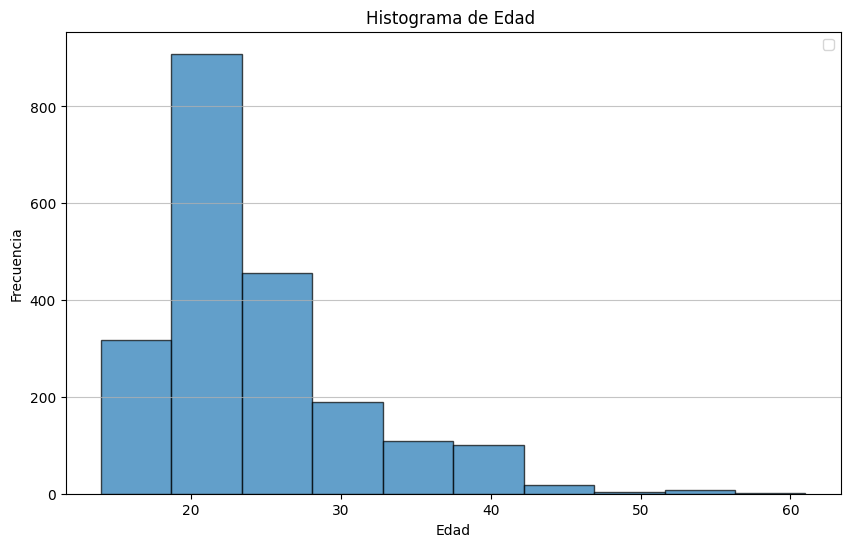

In [13]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.hist(df['Age'], bins=10, edgecolor='black', alpha=0.7)


plt.title('Histograma de Edad ')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.legend()

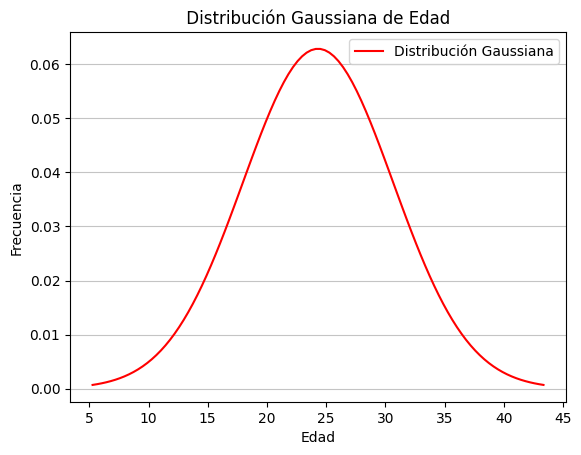

In [14]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()

# Generar valores de edad para la distribución gaussiana
x = np.linspace(mean_age - 3*std_age, mean_age + 3*std_age, 100)
gaussian = np.exp(-(x-mean_age)**2 / (2*std_age**2)) / (std_age * np.sqrt(2 * np.pi))

# Trazar la distribución gaussiana
plt.plot(x, gaussian, color='red', label='Distribución Gaussiana')


# Añadir leyendas y títulos
plt.title(' Distribución Gaussiana de Edad ')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Mostrar el gráfico
plt.legend()
plt.show()

C:\Users\santi\AppData\Local\Temp\ipykernel_23364\2771115617.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Gender', 'family_history_with_overweight', 'NObeyesdad']).size().reset_index(name='count')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


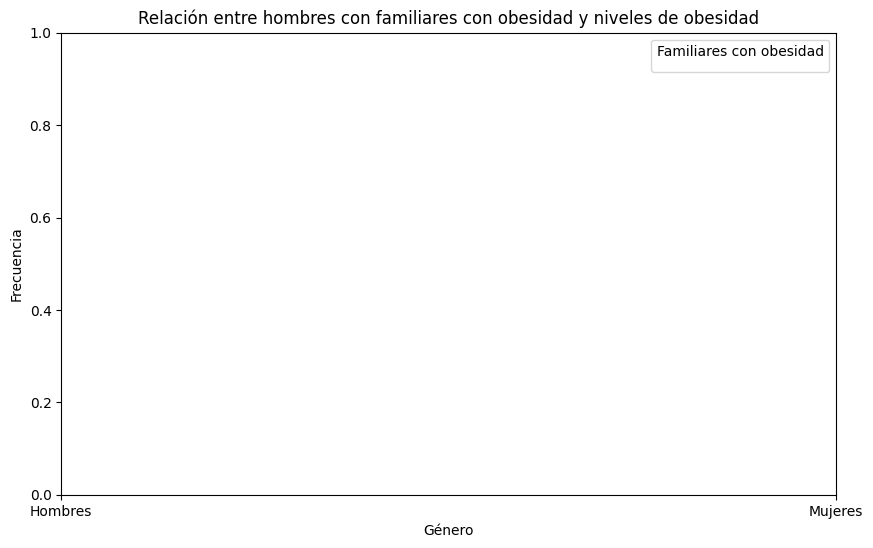

In [19]:
# Asegúrate de que los datos estén en el formato correcto
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'No': 0, 'Yes': 1})
df['NObeyesdad'] = df['NObeyesdad'].astype('category')

# Agrupa y calcula la frecuencia de cada categoría
grouped = df.groupby(['Gender', 'family_history_with_overweight', 'NObeyesdad']).size().reset_index(name='count')

# Visualiza la relación
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='family_history_with_overweight', data=grouped, palette='Set3')
plt.title('Relación entre hombres con familiares con obesidad y niveles de obesidad')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.legend(title='Familiares con obesidad')
plt.show()

